<a href="https://colab.research.google.com/github/RobertTalbert/discretecs/blob/master/Background_for_Euler_and_Hamilton_structures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

The focus of this lesson is on **Eulerian** and **Hamiltonian structures** in graphs. [Your textbook covers this material](http://discrete.openmathbooks.org/dmoi3/sec_paths.html), but some of the key terminology is scattered over multiple sections, so it can be hard to find. The purpose of this document is to put all of the necessary terminology in one place; to give some examples of these concepts; and to show you how to use `networkX` to automate some of the things we will do in class. 

## Terminology

In all of the definitions below, $G$ refers to a graph. 

- A **walk** in $G$ is a sequence of vertices such that every vertex in the sequence is adjacent to the vertex before it and the vertex after it in the sequences. (Alternatively, a walk is a list of edges where two consecutive edges in the list have a vertex in common.) 
- A **path** in $G$ is a walk, where no edges are repeated and in which no vertex is repeated (except possibly the first and last vertices). 
- A **cycle** in $G$ is a path that starts and ends at the same vertex (but contains no other repeated vertices). 
- An **Euler path** (or *Eulerian* path) in $G$ is a path that travels along *every* edge in $G$ *exactly once*. 
- An **Euler circult** (sometimes called an *Euler cycle* or *Euler tour*) in $G$ is an Euler path that starts and ends at the same vertex. 
- A **Hamiltonian path** in $G$ is a path that visits *every vertex* in $G$ exactly once (except perhaps the first and last vertices). 
- A **Hamiltonian cycle** in $G$ is a Hamiltonian path that starts and ends at the same vertex. 

Some notes on these terms: 
- "Euler" is pronounced "OIL-er". It rhymes with "boiler", not with "ruler". 
- Euler and Hamilton structures are named after the legendary mathematicians [Leonhard Euler](https://mathshistory.st-andrews.ac.uk/Biographies/Euler/) and [William Rowan Hamilton](https://mathshistory.st-andrews.ac.uk/Biographies/Hamilton/) whose contributions to math include most of what we call "graph theory" today. 

## Examples and non-examples 

Consider the graph $G$ below. 

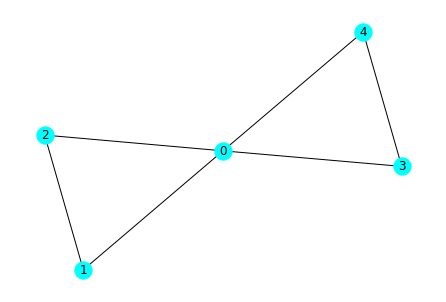

In [5]:
import networkx as nx

G = nx.Graph({0:[1,2,3,4], 1:[2], 3:[4]})
nx.draw(G, with_labels = True, node_color = "cyan")

In this graph: 

- The node sequence 0, 1, 2, 0, 1, 0, 3, 4, 3, 0 is a walk. But the sequence 1, 4, 3, 0 is *not* a walk, because 1 and 4 are not adjacent. 
- The node sequence 0, 1, 2, 0, 1, 0, 3, 4, 3, 0 is a walk but *not* a path, because several edges are repeated. 
- The node sequence 1, 0, 3, 4 is a path. 
- However 1, 0, 3, 4 is *not* an Eulerian path because not every edge is visited. Nor is it a Hamiltonian path because not every vertex is visited. 
- The sequence 0, 2, 1, 0, 3, 4, 0 is an Eulerian path because it is a path that visits every edge and only visits each one once. Actually it's an Eulerian *cycle* because the starting and ending nodes are the same. 
- The sequence 0, 2, 1, 0, 3, 4, 0 is *not* a Hamiltonian path (or cycle) because although it visits every vertex, it vists some of them more than once. 
- The sequence 1, 2, 0, 3, 4 is a Hamiltonian path. But *not* a Hamiltonian cycle because it's not a cycle at all --- it does not start and end at the same vertex. 
- In fact, it does not appear that this graph has a Hamiltonian cycle at all! Can you explain why? 




## Eulerian functions in `networkX`

The `networkX` package provides some helpful functions for working with Eulerian structures: 

- `is_eulerian`: Returns `True` if the input graph has an Eulerian cycle. 
- `has_eulerian_path`: Returns `True` if the input graph has an Eulerian path. 
- `eulerian_circuit`: If the input graph has an Eulerian cycle, this function returns an iterable that contains the cycle as an edge list. Wrapping `list( )` around this function will produce the actual list. 
- `eulerian_path`: Does the same thing as `eulerian_circuit` except for Eulerian paths. 

Testing these out on the "bowtie" graph from above: 

In [6]:
nx.is_eulerian(G)

True

In [7]:
# This by itself doesn't produce output we can see - it's just an "iterable"
nx.eulerian_circuit(G)

<generator object eulerian_circuit at 0x7f27b2e97950>

In [8]:
# Wrap in list( ) to see the list
list(nx.eulerian_circuit(G))

[(0, 4), (4, 3), (3, 0), (0, 2), (2, 1), (1, 0)]

Notice the output here is an edge list, not a node sequence. Also it's a different sequence than what we noted earlier. That's OK, because if a graph has an Eulerian cycle, it could have more than one. 

In [9]:
nx.has_eulerian_path(G)

True

In [10]:
list(nx.eulerian_path(G))

[(0, 1), (1, 2), (2, 0), (0, 3), (3, 4), (4, 0)]

## Where is all the Hamiltonian stuff in `networkX`? 

The `networkX` package does not contain much in the way of Hamiltonian versions of the above functions --- only for special niche graphs. That's because generally speaking **finding Hamiltonian structures in graphs is a very hard computational problem**. Specifically, taking a generic graph $G$ and determining whether it has a Hamiltonian path is [an NP-complete problem](https://en.wikipedia.org/wiki/Hamiltonian_path_problem) which means that there is no simple, quick algorithm that does it in general. For small graphs we can do it manually, and that's what we're stuck with!  